In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

Notes
alcohol, volatitle, citric, sulphates


In [2]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


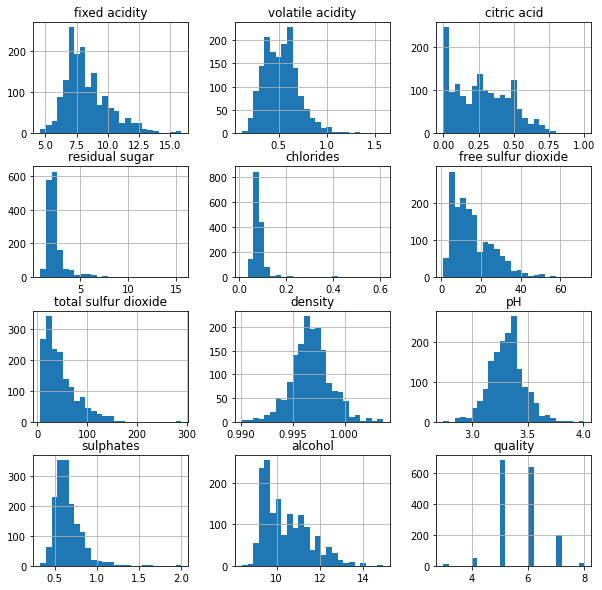

In [4]:
red.hist(bins=25,figsize=(10,10))
plt.show()

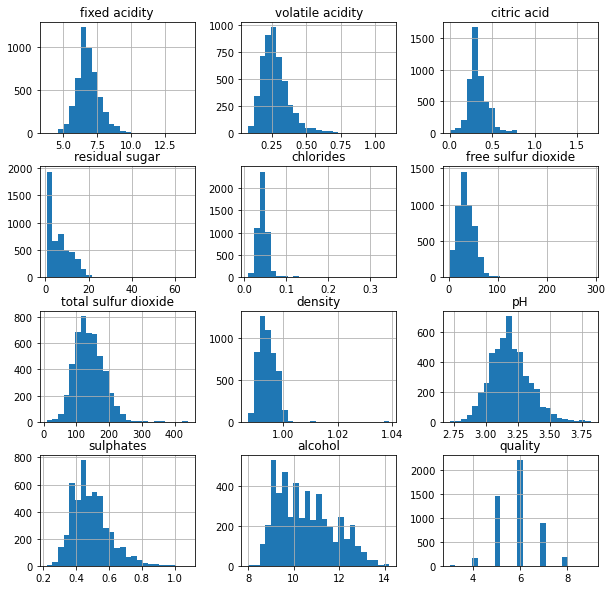

In [5]:
white.hist(bins=25,figsize=(10,10))
plt.show()

<AxesSubplot:>

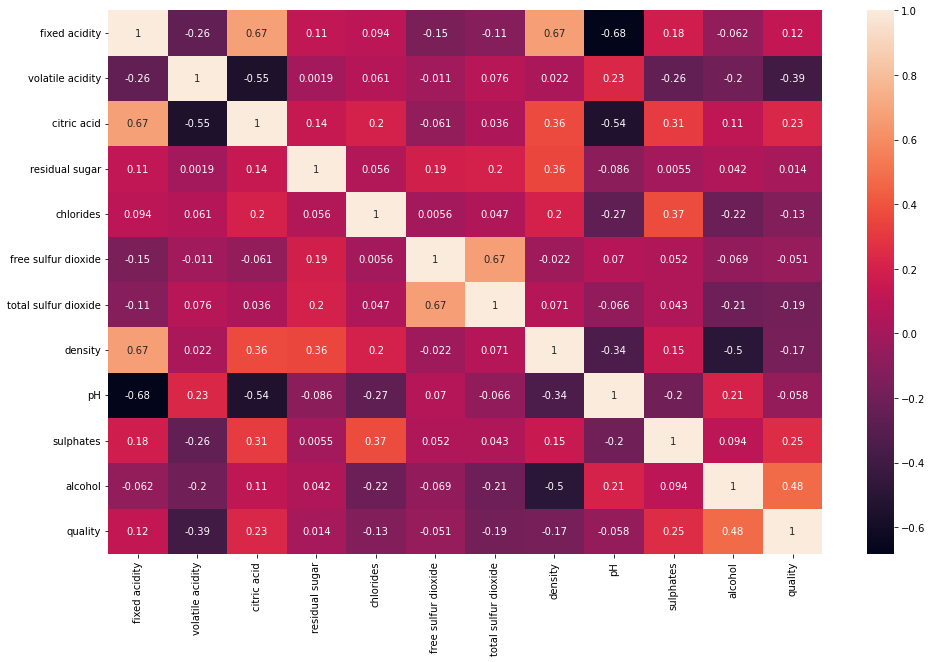

In [6]:
plt.figure(figsize=(16,10))
sns.heatmap(red.corr(),annot=True)

<AxesSubplot:>

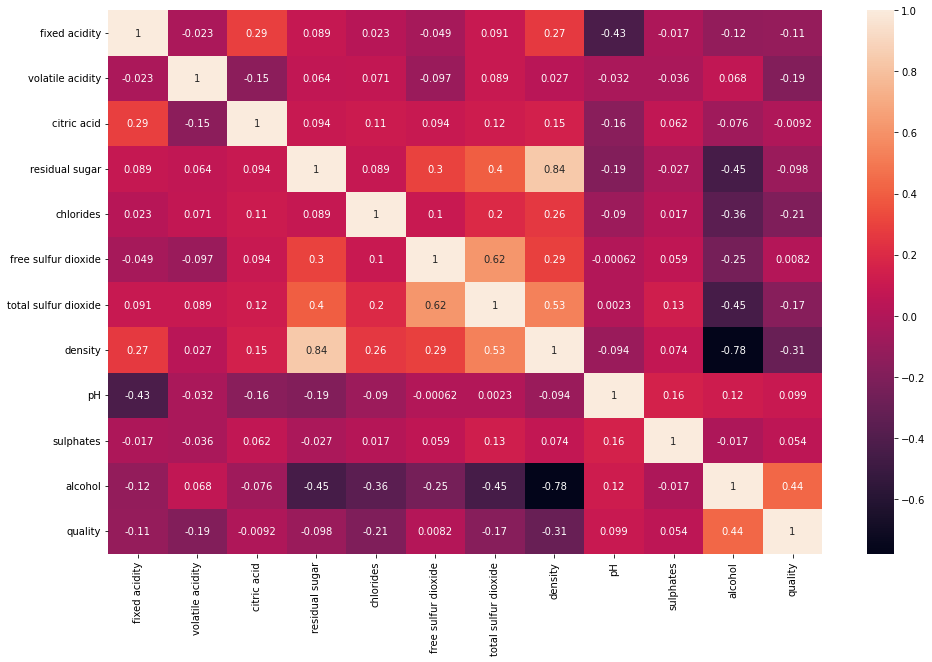

In [7]:
plt.figure(figsize=(16,10))
sns.heatmap(white.corr(),annot=True)

In [8]:
compare = red.loc[:,['alcohol','quality']]
compare = compare.rename(columns={'alcohol':'red alcohol','quality':'red quality',})
compare['white alcohol'] = white['alcohol']
compare['white quality'] = white['quality']
compare

,red alcohol,red quality,white alcohol,white quality
0,9.4,5,8.8,6
1,9.8,5,9.5,6
2,9.8,5,10.1,6
3,9.8,6,9.9,6
4,9.4,5,9.9,6
...,...,...,...,...
1594,10.5,5,9.4,6
1595,11.2,6,9.2,6
1596,11.0,6,11.9,5
1597,10.2,5,9.2,6


In [9]:
#category = pd.DataFrame(data=category, columns=["category"])
#red = pd.concat([red,category],axis=1)
#red.drop(columns="quality",axis=1,inplace=True)


In [10]:
red.head(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


C:\Users\mtoy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

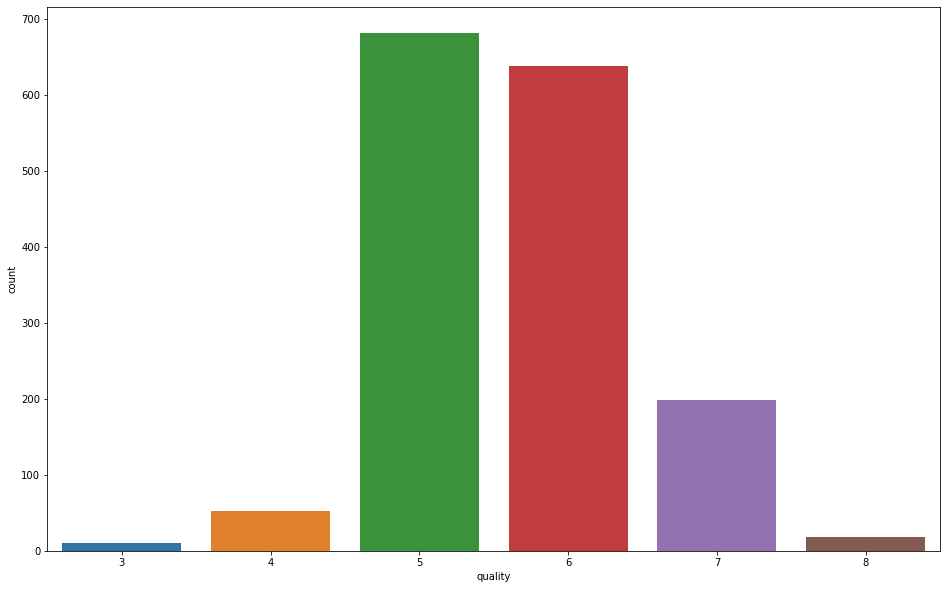

In [11]:
plt.figure(figsize=(16,10))
sns.countplot(red["quality"])
red["quality"].value_counts()

In [12]:
from sklearn.linear_model import LinearRegression

#initiate linear regression model
model = LinearRegression()

#define predictor and response variables
X, y = red[['sulphates']], red.quality

#fit regression model
model.fit(X, y)

#calculate R-squared of regression model
r_squared = model.score(X, y)

#view R-squared value
print(r_squared)

0.06320049136455663


In [13]:
from sklearn.metrics import r2_score
y =red['quality']
f =red['pH']
r2 = r2_score(y, f)
print('r2 score for perfect model is', r2)


r2 score for perfect model is -8.351856121618654


In [14]:
red.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [15]:
white.mean()

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

# Decision Tree

In [16]:
red['wine'] = 'red'
white['wine'] = 'white'
allwine = red.append(white)
allwine

C:\Users\mtoy\AppData\Local\Temp\ipykernel_13904\1849123887.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allwine = red.append(white)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [17]:
features = ['free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'fixed acidity']

X = allwine[features]
y = allwine['wine']

print(X)
print(y)

      free sulfur dioxide  total sulfur dioxide  sulphates  fixed acidity
0                    11.0                  34.0       0.56            7.4
1                    25.0                  67.0       0.68            7.8
2                    15.0                  54.0       0.65            7.8
3                    17.0                  60.0       0.58           11.2
4                    11.0                  34.0       0.56            7.4
...                   ...                   ...        ...            ...
4893                 24.0                  92.0       0.50            6.2
4894                 57.0                 168.0       0.46            6.6
4895                 30.0                 111.0       0.46            6.5
4896                 20.0                 110.0       0.38            5.5
4897                 22.0                  98.0       0.32            6.0

[6497 rows x 4 columns]
0         red
1         red
2         red
3         red
4         red
        ...  
489

In [24]:
d = {'red': 0, 'white': 1}
allwine['wine'] = allwine['wine'].map(d)

print(allwine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [25]:
#not sure about the first line
d = {'red': 0, 'white': 1}
allwine['wine'] = allwine['wine'].map(d)

features = ['free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'fixed acidity']

X = allwine[features]
y = allwine['wine']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [18]:
#look at references for other info we can use
#teach machine to predict if a wine is white or red, sulphates is an important factor for predicting